<a href="https://colab.research.google.com/github/andres00157/Inteligencia_artificial/blob/main/Talle_forecasting/AndresBarretoBaseDatosOro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ORO!!! Forecasting Andres Barreto

In [1]:
## Importando las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:

# la funcion "funcion_costo" calculara el costo de los parametros de entrada
# con respecto a la hipotesis   h(x1,x2) = tetha_0*x1+tetha_1*x2
# tetha: sera un nunpy array de 2 posiciones el cual corresponde a 
#        tetha_0 y tetha_1
# y_fun: sera la etiqueta del sistema
# x1_fun: sera la caractetistica 1 del sistema 
# x2_fun: sera la caractetistica 2 del sistema 
def funcion_costo(tetha,y_fun,x1_fun,x2_fun):

  ## construcion de la hipotesis
  ## funcion hiposis h(x)= tetha[0]*x0+tetha[1]*x1

  h = tetha[0]*x1_fun+tetha[1]*x2_fun

  ## aplicacion funcion de costo 
  costo = np.sum(((h-y_fun)**2))/(2*y_fun.shape[0])


  ## se hizo la prueba con np.power pero la solucion demoro 3.5 veces mas
  ##costo = np.sum(np.power((h-y_fun),2))/(2*y_fun.shape[0])
  return costo



## la funcion "calculo_recta_1" encontrara los parametros para la cual 
## la funcion de densidad sea minima, usando gridsearch
# y: sera la etiqueta del sistema
# x1: sera la caractetistica 1 del sistema 
# x2: sera la caractetistica 2 del sistema 
# min_range: es un parametro el cual indica en que valor va a iniciar la 
#            busqueda del parametro para la minimizacion del costo
# max_range: es un parametro el cual indica en que valor va a finalizar  la 
#            busqueda del parametro para la minimizacion del costo
# step: variable el cual define el salto entre parametros en el gridsearch

def calculo_recta_1(x1,x2,y,min_range,max_range,step):
  # definicion variable el cual guardara los parametros minimos
  parametros_min= np.array([min_range,min_range])

  #definicion variable el guardara la funcion de costo de los parametros minimos
  J_min = funcion_costo(parametros_min,y,x1,x2)

  # 2 for anidados para recorrer todos los parametros
  for teta_0 in np.arange(min_range,max_range,step).tolist():
      for teta_1 in np.arange(min_range,max_range,step).tolist():

          # calculo de funcion de costo para  teta_0,teta_1
          J = funcion_costo(np.array([teta_0,teta_1]),y,x1,x2)

          # verificacion si el valor encontrado es menor que el anterior minimo
          if(J<J_min):
              J_min = J
              parametros_min= np.array([teta_0,teta_1])

  # retorna el parametro minimo junto con su funcion de costo
  return parametros_min,J_min


## la funcion "calculo_recta_1" encontrara los parametros para la cual 
## la funcion de densidad sea minima, moviendose hacia el minimo error
# y: sera la etiqueta del sistema
# x1: sera la caractetistica 1 del sistema 
# x2: sera la caractetistica 2 del sistema 
def calculo_recta_mejorada(x1,x2,y,error):

  # definicion costos de los vecinos mas cercanos del valor
  J= [0,0,0,0,0,0,0,0]

  # definicion variable el cual guardara los parametros minimos
  parametros_min= np.array([-100,-100])

  #definicion variable el guardara la funcion de costo de los parametros minimos
  J_min = funcion_costo(parametros_min,y,x1,x2)

  #variable estatica con el error en -100,-100
  J_guar = J_min

  # definicion variable el cual define los saltos como 1/escalable
  escalable = 1

  # definicion tupla para calculo de minimizacion de vecinos
  intervalos = ([1,0],[0,1],[1,1],[-1,0],[0,-1],[-1,-1],[1,-1],[-1,1])

  # bucle para busqueda del los parametros para la minimizacion
  while(J_min>error and escalable<1000000000):
      J_aux_min = J_guar

      # determina el costo de los vecinos y saca el minimo
      for i in range(8):
          parametro= np.array([parametros_min[0]+intervalos[i][0]/escalable,parametros_min[1]+intervalos[i][1]/escalable])
          J[i]=funcion_costo(parametro,y,x1,x2)
          if(J[i]<J_aux_min):
              J_aux_min= J[i]
              pos_min = i

      # si entre los vecinos ahi un valor menor que el del actual, se mueve a ese valor
      if(J_aux_min<J_min):
          J_min= J_aux_min
          parametros_min= np.array([parametros_min[0]+intervalos[pos_min][0]/escalable,parametros_min[1]+intervalos[pos_min][1]/escalable])

      # si no ahi un minimo, los pasos se vuelven 10 veces mas pequeños
      else:
          escalable *=10
  return parametros_min,J_min

In [3]:
## lectura csv arreglando los valores para ser analizados
dataframeGold = pd.read_csv('gold_price_data.csv')
etiqueta = np.array(dataframeGold['Value'])[2:]
car_m1 = np.array(dataframeGold['Value'])[1:-1]
car_m2 = np.array(dataframeGold['Value'])[:-2]

In [4]:
## calculo recta por metodo grid search
parametros_min,J_min  = (calculo_recta_1(car_m1,car_m2,etiqueta,-2,2,0.01))
parametros_min = np.round(parametros_min,3)
J_min = np.round(J_min,3)
print("Tetha 0 calculado:",parametros_min[0],"Tetha 1 calculado:",parametros_min[1],"Error:",J_min)

## notar que este demora 6 segundos ya teniendo una idea de en donde pueden estar los valores

Tetha 0 calculado: 0.99 Tetha 1 calculado: 0.01 Error: 40.803


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


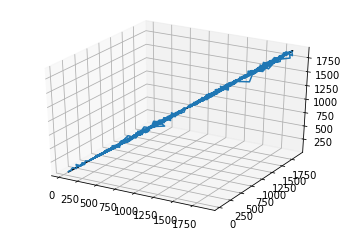

In [5]:
## comparacion grafica original con estimada

## calculo y estimada
salida_estimada  = parametros_min[0]*car_m1+parametros_min[1]*car_m2

fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

ax1.plot_wireframe(np.array([car_m1]), np.array([car_m2]), np.array([etiqueta]))

ax1.plot_wireframe(np.array([car_m1]), np.array([car_m2]), np.array([salida_estimada]),color='black')

# Mostramos el gráfico
plt.show()

In [6]:
## calculo recta usando un 2 metodo mucho mas rapido que el grid search
parametros_min,J_min  = calculo_recta_mejorada(car_m1,car_m2,etiqueta,1)
parametros_min = np.round(parametros_min,7)
J_min = np.round(J_min,7)
print("Tetha 0 calculado:",parametros_min[0],"Tetha 1 calculado:",parametros_min[1],"Error:",J_min)

Tetha 0 calculado: 0.9880528 Tetha 1 calculado: 0.0120678 Error: 40.7987886


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


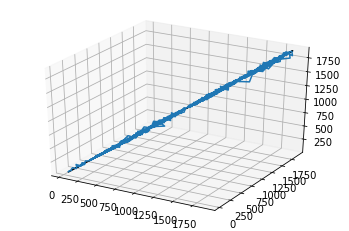

In [7]:
## comparacion grafica original con estimada

## calculo y estimada
salida_estimada  = parametros_min[0]*car_m1+parametros_min[1]*car_m2

fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

ax1.plot_wireframe(np.array([car_m1]), np.array([car_m2]), np.array([etiqueta]))

ax1.plot_wireframe(np.array([car_m1]), np.array([car_m2]), np.array([salida_estimada]),color='black')

# Mostramos el gráfico
plt.show()